In [1]:
import psycopg2
from psycopg2.extras import DictCursor
import numpy as np
import matplotlib.pyplot as plt

try:
        print("\033[95mconnection to database...")
        conn = psycopg2.connect(
            database='piscineds',
            user='bgales',
            password='mysecretpassword',
            host='localhost'
        )
        cursor = conn.cursor(cursor_factory=DictCursor)
        print('\033[92mconnection with database OK')
        cursor.execute('BEGIN;')
except Exception as e:
    print("\033[91mError: ", e)
    print('\033[93mrollback in progress...\033[0m')
    conn.rollback()

connection to database...
connection with database OK


In [2]:
def hide_ticks_frame():
    plt.tick_params(axis='both', which='both', length=0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_facecolor('#EAEAF2')

In [3]:
try:
    print('\033[93mfetching data from database for the first graph...\033[0m')
    cursor.execute(
        '''
            SELECT
            COUNT(user_id) AS sum_counts
            FROM (
                SELECT
                    user_id, COUNT(user_id) as counts
                FROM customers
                WHERE event_type = 'purchase'
                GROUP BY user_id
                HAVING COUNT(user_id) > 0
            ) as counted_users
            GROUP BY FLOOR(counts / 10)
            ORDER BY FLOOR(counts / 10)
        '''
    )
    order_frequency = [int(row[0]) for row in cursor.fetchall()]
    order_frequency = np.array(order_frequency)
    cursor.execute(
        '''
            SELECT COUNT(user_id) FROM customers
            WHERE event_type = 'purchase'
        '''
    )
    customers_nb = cursor.fetchone()[0]
    print('\033[92mdata fetched with success!\033[0m')
except Exception as e:
        print("\033[91mError: ", e)
        print('\033[93mrollback in progress...\033[0m')
        conn.rollback()

fetching data from database for the first graph...
data fetched with success!


displaying graph one...


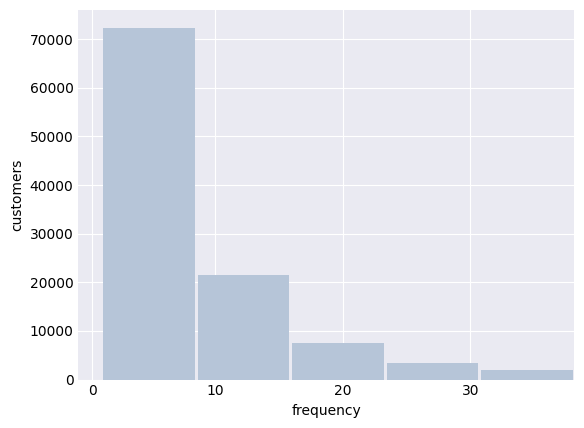

In [4]:
fig, ax = plt.subplots()
x_ticks = np.array(range(len(order_frequency)))
frequency = [0, 10, 20, 30]
plt.bar(x_ticks, order_frequency,
        color='#B6C5D8', alpha=1, width=0.97, zorder=2)
hide_ticks_frame()
plt.ylabel('customers')
plt.xlabel('frequency')
ax.set_xticks((np.array([-0.60, 0.7, 2.05, 3.4])))
ax.set_xticklabels(frequency)
plt.xlim(-0.75, 4.5)
print('\033[2mdisplaying graph one...\033[0m')
plt.grid(color='white', linestyle='-', zorder=0)
plt.show()

In [5]:
try:
    print('\033[93mfetching data from database for the second graph...\033[0m')
    cursor.execute(
        '''
            SELECT
            COUNT(user_id) AS sum_counts
            FROM (
                SELECT
                    user_id, SUM(price) as counts
                FROM customers
                WHERE event_type = 'purchase'
                GROUP BY user_id
                HAVING SUM(price) BETWEEN 0 AND 225
            ) as counted_users
            GROUP BY FLOOR((counts + 25) / 50)
            ORDER BY FLOOR((counts + 25) / 50)
        '''
    )
    totalspent_per_user = [int(row[0]) for row in cursor.fetchall()]
    totalspent_per_user = np.array(totalspent_per_user)
    cursor.execute(
        '''
            SELECT COUNT(user_id) FROM customers
            WHERE event_type = 'purchase'
        '''
    )
    customers_nb = cursor.fetchone()[0]
    print('\033[92mdata fetched with success!\033[0m')
except Exception as e:
    print("\033[91mError: ", e)
    print('\033[93mrollback in progress...\033[0m')
    conn.rollback()

fetching data from database for the second graph...
data fetched with success!


displaying graph two...


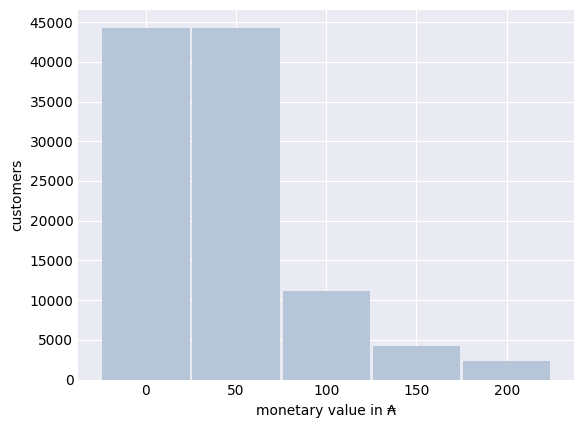

closing connection with database...


In [7]:
fig, ax = plt.subplots()
x_ticks = np.array(range(len(totalspent_per_user)))
plt.bar(x_ticks, totalspent_per_user,
        color='#B6C5D8', alpha=1, width=0.97, zorder=2)
hide_ticks_frame()
plt.ylabel('customers')
plt.xlabel('monetary value in ₳')
plt.xlim(-0.75, 4.75)
ax.set_xticks((np.array([0, 1, 2, 3, 4])))
ax.set_xticklabels([0, 50, 100, 150, 200])
ax.set_yticks(range(0, 50000, 5000))
ax.set_yticklabels(range(0, 50000, 5000))
print('\033[2mdisplaying graph two...\033[0m')
plt.grid(color='white', linestyle='-', zorder=0)
plt.show()

if conn:
    print("\033[95mclosing connection with database...")
    cursor.close()
    conn.close()